# Previsão do preço das ações do Banco do Brasil

##  Importando as bibliotecas Python necessárias e o conjunto de dados

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("BBAS3.SA.csv")   # conjunto de dados 24/10/2022 a 23/10/2023
print(data.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2022-10-24  43.619999  43.680000  40.200001  40.200001  36.848186  37664600
1  2022-10-25  40.099998  40.470001  39.169998  39.509998  36.215714  21368200
2  2022-10-26  39.110001  39.139999  37.180000  38.110001  34.932446  32074200
3  2022-10-27  38.500000  39.400002  38.320000  38.590000  35.372425  20827100
4  2022-10-28  38.240002  38.900002  37.950001  38.820000  35.583252  20428000


In [11]:
# Descobrindo o tamanho do conjunto de dados exibindo linhas e colunas 
data.shape

(250, 7)

In [12]:
# Ultimas linhas do conjunto de dados
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-10-17,49.599998,50.279999,49.200001,49.360001,49.360001,8094600
246,2023-10-18,49.060001,49.700001,48.900002,49.119999,49.119999,11420400
247,2023-10-19,49.119999,50.119999,48.959999,49.500000,49.500000,8135900
248,2023-10-20,49.369999,50.209999,49.150002,49.340000,49.340000,9923300
249,2023-10-23,49.279999,49.520000,48.830002,48.860001,48.860001,884700


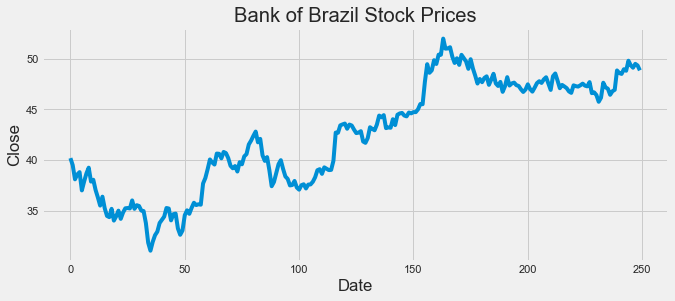

In [13]:
# Plotando um grafico

plt.figure(figsize=(10, 4))
plt.title("Bank of Brazil Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996319  0.996675  0.991983   0.987608 -0.326950
High       0.996319  1.000000  0.996523  0.996925   0.991535 -0.296586
Low        0.996675  0.996523  1.000000  0.996969   0.993874 -0.346477
Close      0.991983  0.996925  0.996969  1.000000   0.995225 -0.318801
Adj Close  0.987608  0.991535  0.993874  0.995225   1.000000 -0.350796
Volume    -0.326950 -0.296586 -0.346477 -0.318801  -0.350796  1.000000


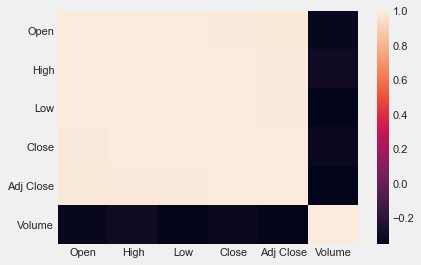

In [4]:

print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [5]:

x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Exibe a previsão para os proximos cinco dias

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0       44.230000
1       37.090000
2       37.020000
3       37.610001
4       39.110001
